In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/Crop_recommendation.csv')

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
columns_to_drop = ['N', 'P','K']
df = df.drop(columns=columns_to_drop)

In [6]:
df.head()

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
df.isna().sum()

temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

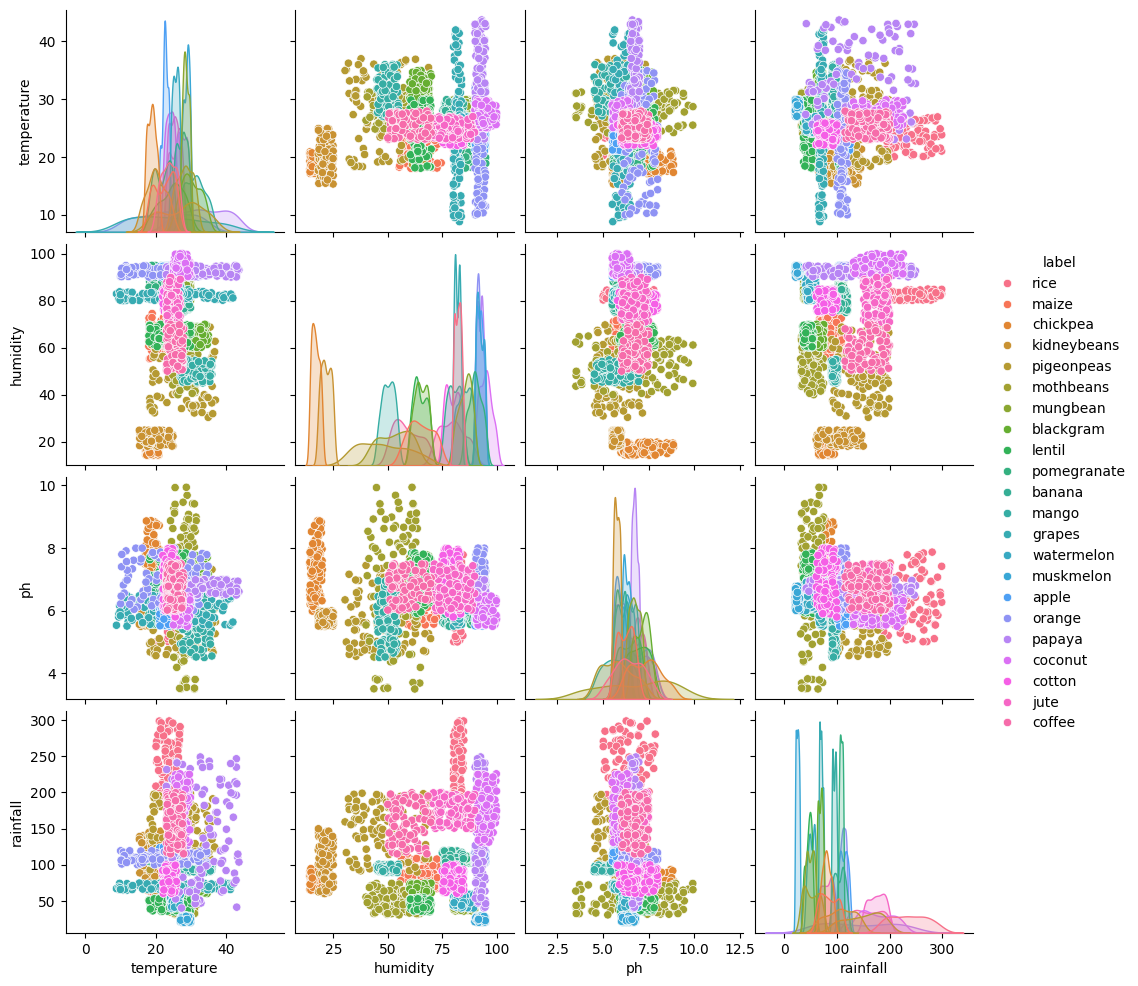

In [9]:
sns.pairplot(df, hue='label')
plt.show()

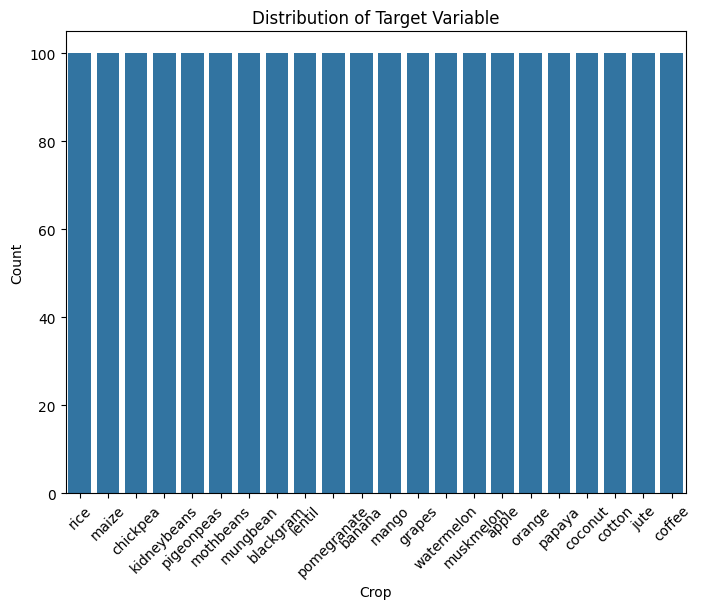

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Crop')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [11]:
X = df.drop('label', axis=1)
y = df['label']

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [13]:
y = pd.DataFrame(y)

In [14]:
y.tail()

,0
2195,5
2196,5
2197,5
2198,5
2199,5


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

classifiers = [
    DecisionTreeClassifier(),
    KNeighborsClassifier()
]

for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{clf.__class__.__name__}: {accuracy:.4f}")

DecisionTreeClassifier: 0.9386
KNeighborsClassifier: 0.8659


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [17]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

<ipython-input-17-5c985f66e0bd>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier()

In [18]:
new_data = {
    'temperature': [32],
    'humidity': [33],
    'ph': [37.76],
    'rainfall': [670]
}
new_df = pd.DataFrame(new_data)

In [19]:
new_data

{'temperature': [32], 'humidity': [33], 'ph': [37.76], 'rainfall': [670]}

In [25]:
print(new_df)

   temperature  humidity     ph  rainfall
0           32        33  37.76       670


In [20]:
test = model.predict(new_df)
test_label = le.inverse_transform(test)
print(test_label)

['pigeonpeas']


In [21]:
import joblib
joblib.dump(model, 'crop_pred_model.pkl')

['crop_pred_model.pkl']

In [22]:
joblib.dump(le,'crop_pred_labelencoder.pkl')

['crop_pred_labelencoder.pkl']

In [23]:
for value, label in zip(le.classes_, le.transform(le.classes_)):
    print(f"{value} -> {label}")

apple -> 0
banana -> 1
blackgram -> 2
chickpea -> 3
coconut -> 4
coffee -> 5
cotton -> 6
grapes -> 7
jute -> 8
kidneybeans -> 9
lentil -> 10
maize -> 11
mango -> 12
mothbeans -> 13
mungbean -> 14
muskmelon -> 15
orange -> 16
papaya -> 17
pigeonpeas -> 18
pomegranate -> 19
rice -> 20
watermelon -> 21
